In [1]:
# Turn on Auto-Complete
%config IPCompleter.greedy=True

In [2]:
# Start logging process at root level
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
logging.root.setLevel(level=logging.INFO)

In [3]:
# Load model and dictionary
dictrionary_root_path = "dictionaries/"
dictionary_unlem_path = dictrionary_root_path+"enwiki-20190409-dict-unlemmatized.txt.bz2"
dictionary_lem_path = dictrionary_root_path+"enwiki-20190409-dict-lemmatized.txt.bz2"
is_lemmatized = False

In [4]:
import os
model_root_path = "models/"
models_list = [name for name in os.listdir(model_root_path) if os.path.isfile(os.path.join(model_root_path, name)) and name.endswith('.model')]
print(len(models_list))

52


In [5]:
from sklearn.manifold import TSNE
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=42)
#fitted_values = tsne_model.fit_transform(tokens)

In [6]:
from gensim.models import Word2Vec

word_to_plot = "woman"
top_similar = 100

for model_name in models_list:
    if "-lem" in model_name:
        dictionary_path = dictionary_lem_path
    else:
        dictionary_path = dictionary_unlem_path
    
    #print("loading model", model)
    model = Word2Vec.load(os.path.join(model_root_path, model_name), mmap='r')
    print("model loaded")
    
    word_vector = model.wv.most_similar(positive=[word_to_plot], topn=top_similar)
    print("word_vector loaded")
    
    word_vocabulary = [word_to_plot]
    for element in word_vector:
        element_name = element[0]
        if element_name not in word_vocabulary:
            word_vocabulary.append(element_name)
    #print(word_vocabulary)
    print("word_vocabulary loaded")
    
    labels = []
    tokens = []
    for word in word_vocabulary:
        tokens.append(model[word])
        labels.append(word)
    
    #print(tokens)
    #print(labels)
    
    fitted_values = tsne_model.fit_transform(tokens)
    
    break

2019-05-20 18:27:32,255 : INFO : 'pattern' package found; tag filters are available for English
2019-05-20 18:27:32,271 : INFO : loading Word2Vec object from models/wiki-en-190409-s300-w5-mc5-bw10000-cbow-i5-c1-unlem.model
2019-05-20 18:27:45,912 : INFO : loading wv recursively from models/wiki-en-190409-s300-w5-mc5-bw10000-cbow-i5-c1-unlem.model.wv.* with mmap=r
2019-05-20 18:27:45,914 : INFO : loading vectors from models/wiki-en-190409-s300-w5-mc5-bw10000-cbow-i5-c1-unlem.model.wv.vectors.npy with mmap=r
2019-05-20 18:27:45,919 : INFO : setting ignored attribute vectors_norm to None
2019-05-20 18:27:45,922 : INFO : loading vocabulary recursively from models/wiki-en-190409-s300-w5-mc5-bw10000-cbow-i5-c1-unlem.model.vocabulary.* with mmap=r
2019-05-20 18:27:45,924 : INFO : loading trainables recursively from models/wiki-en-190409-s300-w5-mc5-bw10000-cbow-i5-c1-unlem.model.trainables.* with mmap=r
2019-05-20 18:27:45,926 : INFO : loading syn1neg from models/wiki-en-190409-s300-w5-mc5-bw

model loaded
word_vector loaded
word_vocabulary loaded


/home/rclaret/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:30: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [13]:
from gensim.models import Word2Vec

word_to_plot = "man"
top_similar = 100

for model_name in models_list:
    if "-lem" in model_name:
        dictionary_path = dictionary_lem_path
    else:
        dictionary_path = dictionary_unlem_path
    
    #print("loading model", model)
    model = Word2Vec.load(os.path.join(model_root_path, model_name), mmap='r')
    print("model loaded")
    
    word_vector = model.wv.most_similar(positive=[word_to_plot], topn=top_similar)
    print("word_vector loaded")
    
    word_vocabulary = [word_to_plot]
    for element in word_vector:
        element_name = element[0]
        if element_name not in word_vocabulary:
            word_vocabulary.append(element_name)
    #print(word_vocabulary)
    print("word_vocabulary loaded")
    
    labels = []
    tokens = []
    banned_words = ["creature", "monster"]
    for word in word_vocabulary:
        if word not in banned_words:
            tokens.append(model[word])
            labels.append(word)
    
    #print(tokens)
    #print(labels)
    
    fitted_values = tsne_model.fit_transform(tokens)
    
    break

2019-05-20 19:58:23,469 : INFO : loading Word2Vec object from models/wiki-en-190409-s300-w5-mc5-bw10000-cbow-i5-c1-unlem.model
2019-05-20 19:58:35,566 : INFO : loading wv recursively from models/wiki-en-190409-s300-w5-mc5-bw10000-cbow-i5-c1-unlem.model.wv.* with mmap=r
2019-05-20 19:58:35,568 : INFO : loading vectors from models/wiki-en-190409-s300-w5-mc5-bw10000-cbow-i5-c1-unlem.model.wv.vectors.npy with mmap=r
2019-05-20 19:58:35,573 : INFO : setting ignored attribute vectors_norm to None
2019-05-20 19:58:35,575 : INFO : loading vocabulary recursively from models/wiki-en-190409-s300-w5-mc5-bw10000-cbow-i5-c1-unlem.model.vocabulary.* with mmap=r
2019-05-20 19:58:35,576 : INFO : loading trainables recursively from models/wiki-en-190409-s300-w5-mc5-bw10000-cbow-i5-c1-unlem.model.trainables.* with mmap=r
2019-05-20 19:58:35,578 : INFO : loading syn1neg from models/wiki-en-190409-s300-w5-mc5-bw10000-cbow-i5-c1-unlem.model.trainables.syn1neg.npy with mmap=r
2019-05-20 19:58:35,582 : INFO :

model loaded
word_vector loaded
word_vocabulary loaded


/home/rclaret/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [11]:
import matplotlib.pyplot as plt
#%matplotlib widget
#%matplotlib notebook
%matplotlib inline

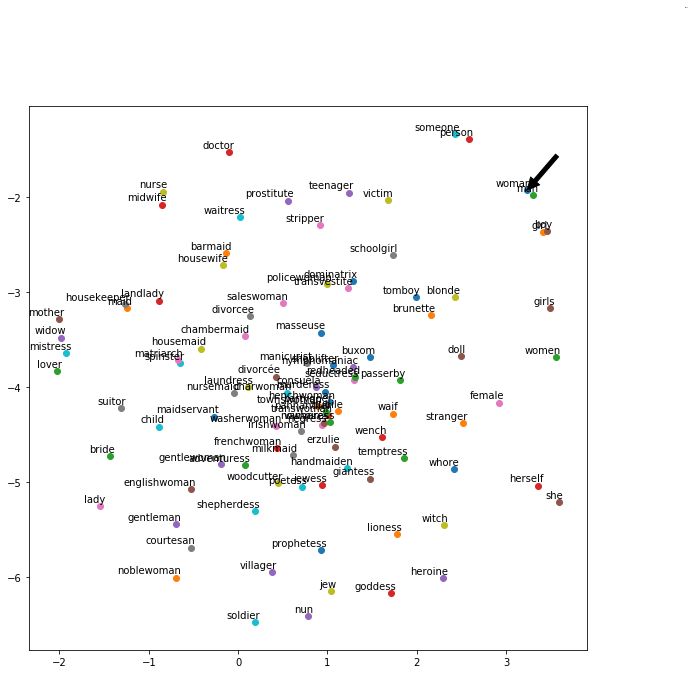

In [8]:
plt.figure(figsize=(10, 10)) 
def plot_word_vector(fitted_values):
    x = []
    y = []
    for value in fitted_values:
        x.append(value[0])
        y.append(value[1])

    
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        if labels[i]==word_to_plot:
            plt.annotate(word_to_plot, xy=(x[i], y[i]), xytext=(5, 0),
            arrowprops=dict(facecolor='black', shrink=0.8),fontsize = 1,
            )
    plt.show()
plot_word_vector(fitted_values)

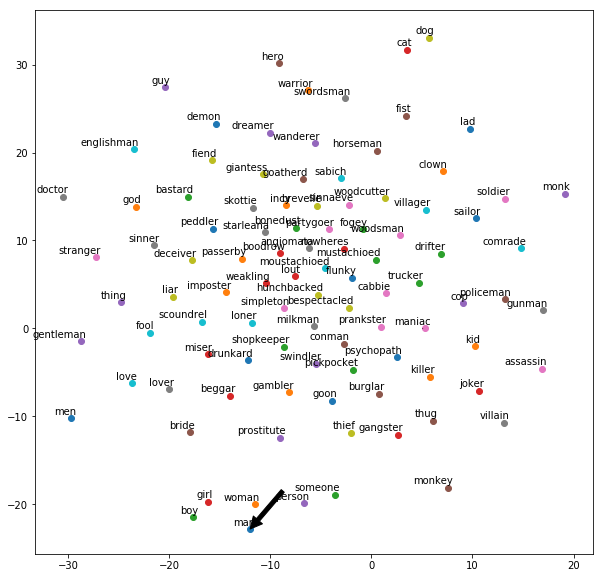

In [14]:
plt.figure(figsize=(10, 10)) 
def plot_word_vector(fitted_values):
    x = []
    y = []
    for value in fitted_values:
        x.append(value[0])
        y.append(value[1])

    
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        if labels[i]==word_to_plot:
            plt.annotate(word_to_plot, xy=(x[i], y[i]), xytext=(5, 0),
            arrowprops=dict(facecolor='black', shrink=0.8),fontsize = 1,
            )
    plt.show()
plot_word_vector(fitted_values)

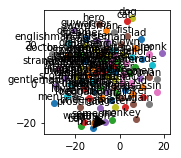

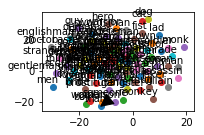

In [20]:
from sklearn.manifold import TSNE

plt.figure(figsize=(5, 5))

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=42, angle=0.5)
plt.subplot(2,2,1)
plot_word_vector(tsne_model.fit_transform(tokens))

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=42, angle=0.5)
plt.subplot(2,2,2)
plot_word_vector(tsne_model.fit_transform(tokens))

In [14]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


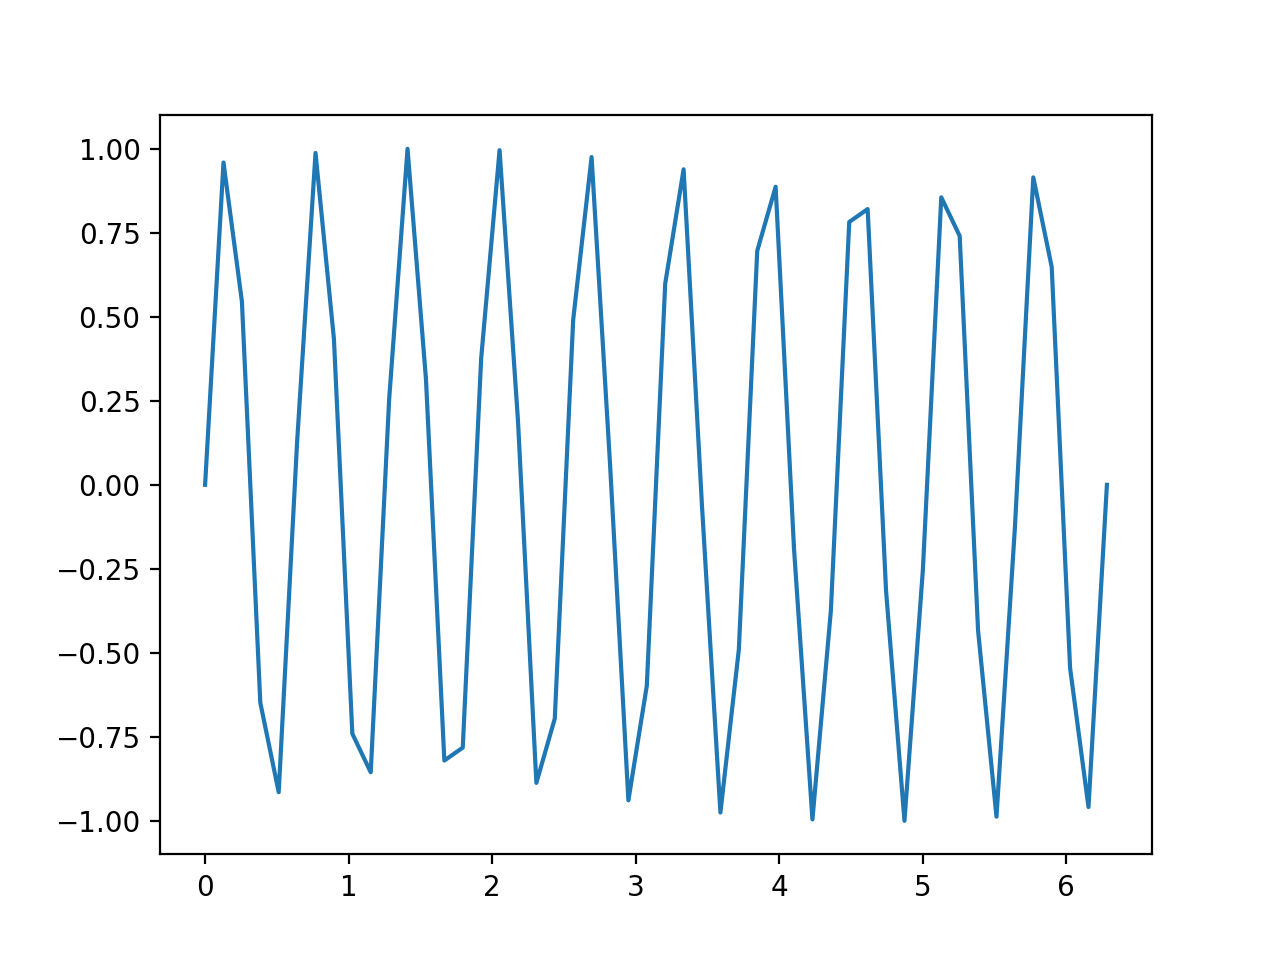

interactive(children=(IntSlider(value=10, continuous_update=False, description='w', max=30, min=-10), Output()…

In [15]:
def update(w):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw()
    
x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))
    
interact(update, w=widgets.IntSlider(min=-10,max=30,step=1,value=10,continuous_update=False));